In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.set_option('display.max_rows',15)

In [2]:
df = pd.read_csv("C:/Users/sc/costa-rican-household-poverty-prediction/train.csv")
df

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [3]:
df.isnull()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9553,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9554,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9555,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

In [5]:
file = (df["parentesco1"] == 1)
df = df[file]
df

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.000000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.000000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.000000,121.0000,8464,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,121,1444,16,121,4,1.777778,1.000000,121.0000,1444,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,...,81,900,16,81,4,16.000000,1.000000,100.0000,900,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,ID_18b0a845b,NaN,0,4,0,1,0,0,NaN,1,...,25,676,25,0,9,6.250000,2.250000,20.2500,676,1
9541,ID_a31274054,NaN,0,3,0,0,0,0,NaN,2,...,4,1600,25,4,9,6.250000,2.250000,16.0000,1600,2
9545,ID_32a00a8bf,46500.0,0,5,0,1,1,0,NaN,1,...,4,2025,25,4,4,5.444444,0.444444,100.0000,2025,4
9551,ID_79d39dddc,NaN,0,3,0,1,1,0,NaN,0,...,0,4489,4,0,0,4.000000,1.000000,9.0000,4489,2


In [14]:
# df = df.drop(["v2a1"],axis=1)
# df = df.drop(["SQBmeaned"],axis=1)
# df = df.drop(["idhogar"],axis=1)
# df = df.drop(["edjefe"],axis=1)
# df = df.drop(["edjefa"],axis=1)

# df = df.drop(["v18q1"],axis=1)

# df = df.drop(["dependency"],axis=1)
df = df.drop(["Id"],axis=1)
df

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,43,100,1849,1,100,0,1.000000,0.000000,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,67,144,4489,1,144,0,1.000000,64.000000,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,92,121,8464,1,0,0,0.250000,64.000000,8464,4
5,0,5,0,1,1,1,0,2,2,1,...,38,121,1444,16,121,4,1.777778,1.000000,1444,4
8,1,2,0,1,1,0,0,1,1,2,...,30,81,900,16,81,4,16.000000,1.000000,900,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,0,4,0,1,0,0,1,1,2,2,...,26,25,676,25,0,9,6.250000,2.250000,676,1
9541,0,3,0,0,0,0,2,2,4,0,...,40,4,1600,25,4,9,6.250000,2.250000,1600,2
9545,0,5,0,1,1,0,1,2,3,0,...,45,4,2025,25,4,4,5.444444,0.444444,2025,4
9551,0,3,0,1,1,0,0,1,1,0,...,67,0,4489,4,0,0,4.000000,1.000000,4489,2


In [15]:
df['Target']

0       4
1       4
2       4
5       4
8       4
       ..
9535    1
9541    2
9545    4
9551    2
9552    2
Name: Target, Length: 2973, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
data_train,data_test,target_train,target_test = train_test_split(df.drop(["Target"],axis=1),
                                                                 df['Target'],
                                                                 test_size = 0.1)

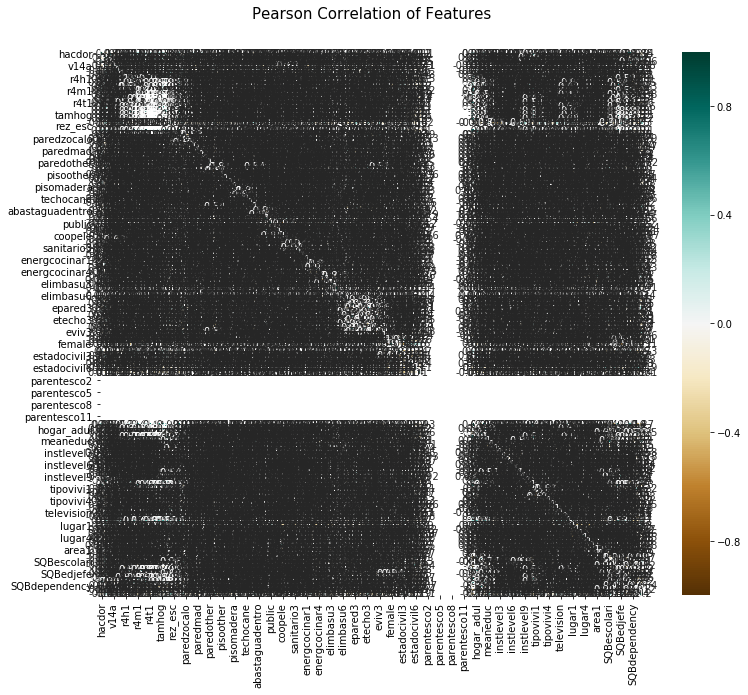

In [17]:
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features',y=1.05,size=15)
sns.heatmap(df.astype(float).corr(), cmap="BrBG",
            linewidths=0.1,
            square=True,
            linecolor = 'white',
            annot = True)

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=15,min_samples_leaf=20)
clf = clf.fit(data_train,target_train)
clf

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [19]:
data_train

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,agesq
8020,0,4,0,1,1,0,0,1,1,0,...,0,57,36,3249,4,36,0,1.000000,0.000000,3249
6072,0,5,0,1,1,1,0,1,1,0,...,0,51,121,2601,4,121,0,0.444444,0.000000,2601
6158,0,5,0,1,1,0,0,1,1,0,...,1,54,36,2916,9,0,4,1.000000,4.000000,2916
2695,0,4,0,1,1,1,0,1,1,0,...,0,68,36,4624,4,36,0,1.000000,1.000000,4624
1909,0,5,0,1,1,0,0,1,1,0,...,0,79,9,6241,4,0,0,0.444444,1.000000,6241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7051,0,5,0,1,1,1,0,0,0,1,...,1,34,196,1156,9,0,1,1.000000,0.250000,1156
9515,0,3,0,1,1,0,0,0,0,1,...,1,41,25,1681,4,0,1,1.000000,1.000000,1681
7933,0,3,0,1,1,0,1,1,2,2,...,0,45,81,2025,25,81,9,6.250000,2.250000,2025
2285,0,5,0,1,1,1,0,1,1,0,...,0,29,196,841,4,0,0,1.000000,0.000000,841
